<h2>Coding A Neural Network 3: Convolution Neural Network (CNN)</h2>

<h3>Step 1: Load the Libraries</h3>

In [4]:
import keras                                       # deep learning package
from keras.datasets import mnist                   # dataset we will use to train our model
from keras.layers import Dense                     # Dense describes how the layers are connected
from keras.models import Sequential                # Sequential means we are creating a sequence of connectec layers
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D,Dropout   #CNN layers
from keras.optimizers import SGD                   # Sochastic gradient descent is the method used to find local minimum
import matplotlib.pyplot as plt                    # visualize images
from keras.preprocessing import image              # preprocess images
import tensorflow as tf                            # another way to obtain the data if keras link is not working

<h3>Step 2: Obtain Data</h3>

In [5]:
(train_x, train_y) , (test_x, test_y) = mnist.load_data()  #load images into training and test datasets
#(train_x, train_y) , (test_x, test_y) = tf.keras.datasets.mnist.load_data(path='mnist.npz') #backup method
#train_x = train_x.astype('float32') / 255                 #optional (you can rescale the RBG for each pixel)
#test_x = test_x.astype('float32') / 255                   #optional (you can rescale the RBG for each pixel)
print(train_x.shape)                                       #let us view the dimensions of the train set
print(train_y.shape)                                       #let us view the dimentions of the train label
print(test_x.shape)                                        #view the dimensions of the test set
print(test_y.shape)                                        #view the dimensions of the test label

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


<h3>Step 3: Reshape Data</h3>

In [6]:
train_x = train_x.reshape(60000,28,28,1)                #reduce dimensions from 28x28 to 1x784
test_x = test_x.reshape(10000,28,28,1)                  #reduce dimensions from 28x28 to 1x784
train_y = keras.utils.to_categorical(train_y,10)    #convert y label to categorical with 10 possible outputs
test_y = keras.utils.to_categorical(test_y,10)      #convert y label to categorical with 10 possible outputs
print(train_x.shape)                                #view the new shape of training set
print(train_y.shape)                                #view the new shape of training label
print(test_x.shape)                                 #view the new shape of the test set
print(test_y.shape)                                 #view the new shape of the test label

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [7]:
train_x[1].shape #view the content of one reshaped image. How is it different from before?


(28, 28, 1)

In [8]:
train_y[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

<h3>Step 4: Define Your Model</h3>

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3),
                 activation='relu',
                 input_shape=(28,28,1),strides=(2,2)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten(name='flatten'))
model.add(Dense(10, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 13, 13, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                11530     
Total params: 11,850
Trainable params: 11,850
Non-trainable params: 0
_________________________________________________________________


In [80]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
__________

<h3>Step 5: Compile Your Model</h3>

In [10]:
model.compile(optimizer=keras.optimizers.Adadelta(),loss="categorical_crossentropy",metrics=["accuracy"])

#what is SGD?
#what is lr?
#what is loss?

<h3>Step 6: Fit Your Model</h3>

In [27]:
history=model.fit(train_x,train_y,validation_data=(test_x, test_y),epochs=20, batch_size=128,verbose=1)
#train_x: Your training dataset
#train_y: Your training label
#epochs:       one forward pass and one backward pass of all the training examples
#batch_size:   the number of training examples in one forward/backward pass
#verbose: display log on screen

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
  128/60000 [..............................] - ETA: 19s - loss: 0.0019 - acc: 1.0000

  384/60000 [..............................] - ETA: 18s - loss: 0.0037 - acc: 1.0000

  768/60000 [..............................] - ETA: 17s - loss: 0.0166 - acc: 0.9974

 1024/60000 [..............................] - ETA: 15s - loss: 0.0148 - acc: 0.9971

 1152/60000 [..............................] - ETA: 17s - loss: 0.0131 - acc: 0.9974

 1408/60000 [..............................] - ETA: 17s - loss: 0.0118 - acc: 0.9972

 1664/60000 [..............................] - ETA: 16s - loss: 0.0107 - acc: 0.9970

 1792/60000 [..............................] - ETA: 17s - loss: 0.0100 - acc: 0.9972

 2048/60000 [>.............................] - ETA: 16s - loss: 0.0094 - acc: 0.9971

 2176/60000 [>.............................] - ETA: 17s - loss: 0.0089 - acc: 0.9972

 2432/60000 [>.............................] - ETA: 17s - loss: 0.0083 - acc: 0.9975

 2816/60000 [>.............................] - ETA: 17s - loss: 0.0074 - acc: 0.9979

 3200/60000 [>.............................] - ETA: 16s - loss: 0.0085 - acc: 0.9975

 3456/60000 [>.............................] - ETA: 16s - loss: 0.0079 - acc: 0.9977

 3712/60000 [>.............................] - ETA: 17s - loss: 0.0078 - acc: 0.9976

 4096/60000 [=>............................] - ETA: 16s - loss: 0.0083 - acc: 0.9973

 4480/60000 [=>............................] - ETA: 16s - loss: 0.0079 - acc: 0.9975

 4864/60000 [=>............................] - ETA: 15s - loss: 0.0075 - acc: 0.9975

 4992/60000 [=>............................] - ETA: 15s - loss: 0.0073 - acc: 0.9976

 5248/60000 [=>............................] - ETA: 15s - loss: 0.0071 - acc: 0.9977

 5504/60000 [=>............................] - ETA: 16s - loss: 0.0068 - acc: 0.9978

 5888/60000 [=>............................] - ETA: 15s - loss: 0.0072 - acc: 0.9976

 6144/60000 [==>...........................] - ETA: 15s - loss: 0.0071 - acc: 0.9976

 6400/60000 [==>...........................] - ETA: 15s - loss: 0.0069 - acc: 0.9977



 6528/60000 [==>...........................] - ETA: 15s - loss: 0.0068 - acc: 0.9977

 6784/60000 [==>...........................] - ETA: 15s - loss: 0.0066 - acc: 0.9978

 7168/60000 [==>...........................] - ETA: 15s - loss: 0.0067 - acc: 0.9976

 7552/60000 [==>...........................] - ETA: 15s - loss: 0.0064 - acc: 0.9977

 7936/60000 [==>...........................] - ETA: 15s - loss: 0.0074 - acc: 0.9975

 8192/60000 [===>..........................] - ETA: 15s - loss: 0.0072 - acc: 0.9976

 8448/60000 [===>..........................] - ETA: 14s - loss: 0.0077 - acc: 0.9973

 8704/60000 [===>..........................] - ETA: 14s - loss: 0.0075 - acc: 0.9974

 8960/60000 [===>..........................] - ETA: 15s - loss: 0.0091 - acc: 0.9973

 9088/60000 [===>..........................] - ETA: 15s - loss: 0.0090 - acc: 0.9974

 9216/60000 [===>..........................] - ETA: 15s - loss: 0.0088 - acc: 0.9974

 9472/60000 [===>..........................] - ETA: 15s - loss: 0.0088 - acc: 0.9974

 9856/60000 [===>..........................] - ETA: 15s - loss: 0.0094 - acc: 0.9973

10240/60000 [====>.........................] - ETA: 15s - loss: 0.0091 - acc: 0.9974

10624/60000 [====>.........................] - ETA: 15s - loss: 0.0093 - acc: 0.9973

11008/60000 [====>.........................] - ETA: 14s - loss: 0.0092 - acc: 0.9974

11392/60000 [====>.........................] - ETA: 14s - loss: 0.0093 - acc: 0.9974

11520/60000 [====>.........................] - ETA: 14s - loss: 0.0094 - acc: 0.9973

11648/60000 [====>.........................] - ETA: 15s - loss: 0.0093 - acc: 0.9973

11904/60000 [====>.........................] - ETA: 15s - loss: 0.0092 - acc: 0.9974

12288/60000 [=====>........................] - ETA: 14s - loss: 0.0091 - acc: 0.9974

12544/60000 [=====>........................] - ETA: 14s - loss: 0.0093 - acc: 0.9973

12928/60000 [=====>........................] - ETA: 14s - loss: 0.0098 - acc: 0.9971

13184/60000 [=====>........................] - ETA: 14s - loss: 0.0097 - acc: 0.9972

13312/60000 [=====>........................] - ETA: 14s - loss: 0.0096 - acc: 0.9972

13568/60000 [=====>........................] - ETA: 14s - loss: 0.0108 - acc: 0.9971

13952/60000 [=====>........................] - ETA: 14s - loss: 0.0105 - acc: 0.9972

14336/60000 [======>.......................] - ETA: 14s - loss: 0.0103 - acc: 0.9973

14592/60000 [======>.......................] - ETA: 13s - loss: 0.0102 - acc: 0.9973

14720/60000 [======>.......................] - ETA: 13s - loss: 0.0101 - acc: 0.9974

14976/60000 [======>.......................] - ETA: 13s - loss: 0.0101 - acc: 0.9973

15232/60000 [======>.......................] - ETA: 13s - loss: 0.0099 - acc: 0.9974

15616/60000 [======>.......................] - ETA: 13s - loss: 0.0097 - acc: 0.9974

16000/60000 [=======>......................] - ETA: 13s - loss: 0.0096 - acc: 0.9975

16256/60000 [=======>......................] - ETA: 13s - loss: 0.0094 - acc: 0.9975

16640/60000 [=======>......................] - ETA: 13s - loss: 0.0092 - acc: 0.9976

16896/60000 [=======>......................] - ETA: 13s - loss: 0.0093 - acc: 0.9976

17280/60000 [=======>......................] - ETA: 13s - loss: 0.0091 - acc: 0.9976

17664/60000 [=======>......................] - ETA: 13s - loss: 0.0089 - acc: 0.9977

17920/60000 [=======>......................] - ETA: 12s - loss: 0.0088 - acc: 0.9977

18304/60000 [========>.....................] - ETA: 12s - loss: 0.0087 - acc: 0.9978

18560/60000 [========>.....................] - ETA: 12s - loss: 0.0087 - acc: 0.9977

18944/60000 [========>.....................] - ETA: 12s - loss: 0.0087 - acc: 0.9977

19328/60000 [========>.....................] - ETA: 12s - loss: 0.0087 - acc: 0.9977

19712/60000 [========>.....................] - ETA: 12s - loss: 0.0086 - acc: 0.9977

20096/60000 [=========>....................] - ETA: 12s - loss: 0.0085 - acc: 0.9977

20480/60000 [=========>....................] - ETA: 12s - loss: 0.0089 - acc: 0.9977

…

55808/60000 [==========================>...] - ETA: 1s - loss: 0.0087 - acc: 0.9981

56064/60000 [===========================>..] - ETA: 0s - loss: 0.0087 - acc: 0.9981

56320/60000 [===========================>..] - ETA: 0s - loss: 0.0086 - acc: 0.9981

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0086 - acc: 0.9981

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0086 - acc: 0.9981

57088/60000 [===========================>..] - ETA: 0s - loss: 0.0086 - acc: 0.9981

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0086 - acc: 0.9981

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0085 - acc: 0.9981

58240/60000 [============================>.] - ETA: 0s - loss: 0.0085 - acc: 0.9981

58752/60000 [============================>.] - ETA: 0s - loss: 0.0084 - acc: 0.9981

59136/60000 [============================>.] - ETA: 0s - loss: 0.0084 - acc: 0.9981

59520/60000 [============================>.] - ETA: 0s - loss: 0.0083 - acc: 0.9981

59648/60000 [============================>.] - ETA: 0s - loss: 0.0086 - acc: 0.9981

59904/60000 [============================>.] - ETA: 0s - loss: 0.0087 - acc: 0.9981

60000/60000 [==============================] - 15s 254us/step - loss: 0.0087 - acc: 0.9981 - val_loss: 0.1793 - val_acc: 0.9772


Epoch 17/20
  128/60000 [..............................] - ETA: 5s - loss: 5.2032e-04 - acc: 1.0000

  256/60000 [..............................] - ETA: 16s - loss: 2.8112e-04 - acc: 1.0000

  768/60000 [..............................] - ETA: 14s - loss: 5.5548e-04 - acc: 1.0000

 1152/60000 [..............................] - ETA: 14s - loss: 0.0190 - acc: 0.9983    

 1536/60000 [..............................] - ETA: 13s - loss: 0.0166 - acc: 0.9974

 1920/60000 [..............................] - ETA: 12s - loss: 0.0138 - acc: 0.9979

 2048/60000 [>.............................] - ETA: 13s - loss: 0.0136 - acc: 0.9980

 2432/60000 [>.............................] - ETA: 13s - loss: 0.0117 - acc: 0.9984

 2816/60000 [>.............................] - ETA: 13s - loss: 0.0102 - acc: 0.9986

 3200/60000 [>.............................] - ETA: 12s - loss: 0.0091 - acc: 0.9988

 3328/60000 [>.............................] - ETA: 13s - loss: 0.0087 - acc: 0.9988

 3712/60000 [>.............................] - ETA: 13s - loss: 0.0094 - acc: 0.9984

 4096/60000 [=>............................] - ETA: 13s - loss: 0.0131 - acc: 0.9980

 4352/60000 [=>............................] - ETA: 12s - loss: 0.0124 - acc: 0.9982

 4608/60000 [=>............................] - ETA: 13s - loss: 0.0124 - acc: 0.9980

 4864/60000 [=>............................] - ETA: 13s - loss: 0.0117 - acc: 0.9981

 5120/60000 [=>............................] - ETA: 12s - loss: 0.0113 - acc: 0.9982

 5376/60000 [=>............................] - ETA: 12s - loss: 0.0108 - acc: 0.9983

 5888/60000 [=>............................] - ETA: 12s - loss: 0.0107 - acc: 0.9981

 6272/60000 [==>...........................] - ETA: 12s - loss: 0.0101 - acc: 0.9982

 6656/60000 [==>...........................] - ETA: 12s - loss: 0.0099 - acc: 0.9982

 6784/60000 [==>...........................] - ETA: 12s - loss: 0.0098 - acc: 0.9982

 7168/60000 [==>...........................] - ETA: 12s - loss: 0.0093 - acc: 0.9983

 7552/60000 [==>...........................] - ETA: 12s - loss: 0.0089 - acc: 0.9984

 7936/60000 [==>...........................] - ETA: 11s - loss: 0.0087 - acc: 0.9984



 8064/60000 [===>..........................] - ETA: 12s - loss: 0.0086 - acc: 0.9984

 8320/60000 [===>..........................] - ETA: 12s - loss: 0.0083 - acc: 0.9984

 8704/60000 [===>..........................] - ETA: 11s - loss: 0.0079 - acc: 0.9985

 8832/60000 [===>..........................] - ETA: 12s - loss: 0.0078 - acc: 0.9985

 9216/60000 [===>..........................] - ETA: 12s - loss: 0.0075 - acc: 0.9986

 9600/60000 [===>..........................] - ETA: 11s - loss: 0.0073 - acc: 0.9986

10112/60000 [====>.........................] - ETA: 11s - loss: 0.0073 - acc: 0.9986

10496/60000 [====>.........................] - ETA: 11s - loss: 0.0076 - acc: 0.9984

10880/60000 [====>.........................] - ETA: 11s - loss: 0.0074 - acc: 0.9984

11008/60000 [====>.........................] - ETA: 11s - loss: 0.0080 - acc: 0.9983

11392/60000 [====>.........................] - ETA: 11s - loss: 0.0078 - acc: 0.9982

11776/60000 [====>.........................] - ETA: 11s - loss: 0.0077 - acc: 0.9981

12160/60000 [=====>........................] - ETA: 11s - loss: 0.0076 - acc: 0.9981

12288/60000 [=====>........................] - ETA: 11s - loss: 0.0075 - acc: 0.9981

12672/60000 [=====>........................] - ETA: 11s - loss: 0.0074 - acc: 0.9982

13056/60000 [=====>........................] - ETA: 11s - loss: 0.0073 - acc: 0.9982

13568/60000 [=====>........................] - ETA: 10s - loss: 0.0070 - acc: 0.9982

13952/60000 [=====>........................] - ETA: 10s - loss: 0.0071 - acc: 0.9982

14336/60000 [======>.......................] - ETA: 10s - loss: 0.0070 - acc: 0.9982

14848/60000 [======>.......................] - ETA: 10s - loss: 0.0068 - acc: 0.9982

15232/60000 [======>.......................] - ETA: 10s - loss: 0.0066 - acc: 0.9983

15616/60000 [======>.......................] - ETA: 10s - loss: 0.0065 - acc: 0.9983

16128/60000 [=======>......................] - ETA: 10s - loss: 0.0063 - acc: 0.9984

16512/60000 [=======>......................] - ETA: 10s - loss: 0.0063 - acc: 0.9984

16896/60000 [=======>......................] - ETA: 10s - loss: 0.0063 - acc: 0.9983

17408/60000 [=======>......................] - ETA: 9s - loss: 0.0062 - acc: 0.9984 

17792/60000 [=======>......................] - ETA: 9s - loss: 0.0060 - acc: 0.9984

18176/60000 [========>.....................] - ETA: 9s - loss: 0.0059 - acc: 0.9985

18688/60000 [========>.....................] - ETA: 9s - loss: 0.0058 - acc: 0.9985

19072/60000 [========>.....................] - ETA: 9s - loss: 0.0059 - acc: 0.9985

19456/60000 [========>.....................] - ETA: 9s - loss: 0.0058 - acc: 0.9985

19840/60000 [========>.....................] - ETA: 9s - loss: 0.0059 - acc: 0.9984

20096/60000 [=========>....................] - ETA: 9s - loss: 0.0064 - acc: 0.9984

20352/60000 [=========>....................] - ETA: 9s - loss: 0.0063 - acc: 0.9984

20736/60000 [=========>....................] - ETA: 9s - loss: 0.0062 - acc: 0.9984

21120/60000 [=========>....................] - ETA: 9s - loss: 0.0068 - acc: 0.9984

21376/60000 [=========>....................] - ETA: 9s - loss: 0.0068 - acc: 0.9984

21632/60000 [=========>....................] - ETA: 9s - loss: 0.0067 - acc: 0.9984

21888/60000 [=========>....................] - ETA: 9s - loss: 0.0066 - acc: 0.9984

22400/60000 [==========>...................] - ETA: 8s - loss: 0.0065 - acc: 0.9985

22784/60000 [==========>...................] - ETA: 8s - loss: 0.0064 - acc: 0.9985

23168/60000 [==========>...................] - ETA: 8s - loss: 0.0065 - acc: 0.9984

23552/60000 [==========>...................] - ETA: 8s - loss: 0.0071 - acc: 0.9984

23680/60000 [==========>...................] - ETA: 8s - loss: 0.0070 - acc: 0.9984

24064/60000 [===========>..................] - ETA: 8s - loss: 0.0071 - acc: 0.9984

24576/60000 [===========>..................] - ETA: 8s - loss: 0.0070 - acc: 0.9985

24960/60000 [===========>..................] - ETA: 8s - loss: 0.0070 - acc: 0.9984

25344/60000 [===========>..................] - ETA: 8s - loss: 0.0070 - acc: 0.9984

25728/60000 [===========>..................] - ETA: 8s - loss: 0.0069 - acc: 0.9984

25856/60000 [===========>..................] - ETA: 8s - loss: 0.0070 - acc: 0.9983

26240/60000 [============>.................] - ETA: 7s - loss: 0.0075 - acc: 0.9983

26624/60000 [============>.................] - ETA: 7s - loss: 0.0074 - acc: 0.9983

27008/60000 [============>.................] - ETA: 7s - loss: 0.0082 - acc: 0.9983

27136/60000 [============>.................] - ETA: 7s - loss: 0.0084 - acc: 0.9982

27520/60000 [============>.................] - ETA: 7s - loss: 0.0083 - acc: 0.9983

27904/60000 [============>.................] - ETA: 7s - loss: 0.0082 - acc: 0.9983

28416/60000 [=============>................] - ETA: 7s - loss: 0.0082 - acc: 0.9982

28800/60000 [=============>................] - ETA: 7s - loss: 0.0082 - acc: 0.9982

29184/60000 [=============>................] - ETA: 7s - loss: 0.0088 - acc: 0.9982

29568/60000 [=============>................] - ETA: 7s - loss: 0.0087 - acc: 0.9982

29696/60000 [=============>................] - ETA: 7s - loss: 0.0087 - acc: 0.9982

30080/60000 [==============>...............] - ETA: 7s - loss: 0.0088 - acc: 0.9982

30464/60000 [==============>...............] - ETA: 6s - loss: 0.0087 - acc: 0.9982

30848/60000 [==============>...............] - ETA: 6s - loss: 0.0087 - acc: 0.9982

31232/60000 [==============>...............] - ETA: 6s - loss: 0.0087 - acc: 0.9981

31360/60000 [==============>...............] - ETA: 6s - loss: 0.0087 - acc: 0.9982

31744/60000 [==============>...............] - ETA: 6s - loss: 0.0086 - acc: 0.9982

32128/60000 [===============>..............] - ETA: 6s - loss: 0.0088 - acc: 0.9982

32512/60000 [===============>..............] - ETA: 6s - loss: 0.0087 - acc: 0.9982

32896/60000 [===============>..............] - ETA: 6s - loss: 0.0087 - acc: 0.9981

33152/60000 [===============>..............] - ETA: 6s - loss: 0.0086 - acc: 0.9982

33408/60000 [===============>..............] - ETA: 6s - loss: 0.0086 - acc: 0.9982

33792/60000 [===============>..............] - ETA: 6s - loss: 0.0085 - acc: 0.9982

34176/60000 [================>.............] - ETA: 6s - loss: 0.0084 - acc: 0.9982

34688/60000 [================>.............] - ETA: 5s - loss: 0.0084 - acc: 0.9982

35072/60000 [================>.............] - ETA: 5s - loss: 0.0083 - acc: 0.9982

35456/60000 [================>.............] - ETA: 5s - loss: 0.0082 - acc: 0.9982

35968/60000 [================>.............] - ETA: 5s - loss: 0.0081 - acc: 0.9982

36352/60000 [=================>............] - ETA: 5s - loss: 0.0080 - acc: 0.9983

36736/60000 [=================>............] - ETA: 5s - loss: 0.0079 - acc: 0.9983

37120/60000 [=================>............] - ETA: 5s - loss: 0.0079 - acc: 0.9983

37504/60000 [=================>............] - ETA: 5s - loss: 0.0078 - acc: 0.9983

37632/60000 [=================>............] - ETA: 5s - loss: 0.0078 - acc: 0.9983

38016/60000 [==================>...........] - ETA: 5s - loss: 0.0081 - acc: 0.9983

38272/60000 [==================>...........] - ETA: 5s - loss: 0.0081 - acc: 0.9983

38528/60000 [==================>...........] - ETA: 5s - loss: 0.0081 - acc: 0.9983

38912/60000 [==================>...........] - ETA: 4s - loss: 0.0082 - acc: 0.9982

39296/60000 [==================>...........] - ETA: 4s - loss: 0.0082 - acc: 0.9982

39680/60000 [==================>...........] - ETA: 4s - loss: 0.0081 - acc: 0.9982

39808/60000 [==================>...........] - ETA: 4s - loss: 0.0081 - acc: 0.9982

40192/60000 [===================>..........] - ETA: 4s - loss: 0.0081 - acc: 0.9982

40576/60000 [===================>..........] - ETA: 4s - loss: 0.0081 - acc: 0.9982

40960/60000 [===================>..........] - ETA: 4s - loss: 0.0083 - acc: 0.9981

41088/60000 [===================>..........] - ETA: 4s - loss: 0.0082 - acc: 0.9982

41472/60000 [===================>..........] - ETA: 4s - loss: 0.0082 - acc: 0.9982

41856/60000 [===================>..........] - ETA: 4s - loss: 0.0085 - acc: 0.9981

42240/60000 [====================>.........] - ETA: 4s - loss: 0.0090 - acc: 0.9981

42368/60000 [====================>.........] - ETA: 4s - loss: 0.0089 - acc: 0.9981

42752/60000 [====================>.........] - ETA: 4s - loss: 0.0090 - acc: 0.9981

43264/60000 [====================>.........] - ETA: 3s - loss: 0.0090 - acc: 0.9981

43648/60000 [====================>.........] - ETA: 3s - loss: 0.0090 - acc: 0.9981

43904/60000 [====================>.........] - ETA: 3s - loss: 0.0090 - acc: 0.9981

44160/60000 [=====================>........] - ETA: 3s - loss: 0.0090 - acc: 0.9981

44544/60000 [=====================>........] - ETA: 3s - loss: 0.0089 - acc: 0.9981

44928/60000 [=====================>........] - ETA: 3s - loss: 0.0089 - acc: 0.9981

45312/60000 [=====================>........] - ETA: 3s - loss: 0.0088 - acc: 0.9981

45696/60000 [=====================>........] - ETA: 3s - loss: 0.0087 - acc: 0.9982

45952/60000 [=====================>........] - ETA: 3s - loss: 0.0087 - acc: 0.9982

46208/60000 [======================>.......] - ETA: 3s - loss: 0.0087 - acc: 0.9982

46592/60000 [======================>.......] - ETA: 3s - loss: 0.0086 - acc: 0.9982

46976/60000 [======================>.......] - ETA: 3s - loss: 0.0086 - acc: 0.9982

47360/60000 [======================>.......] - ETA: 2s - loss: 0.0085 - acc: 0.9982

47744/60000 [======================>.......] - ETA: 2s - loss: 0.0085 - acc: 0.9982

47872/60000 [======================>.......] - ETA: 2s - loss: 0.0084 - acc: 0.9982

48256/60000 [=======================>......] - ETA: 2s - loss: 0.0084 - acc: 0.9982

48640/60000 [=======================>......] - ETA: 2s - loss: 0.0088 - acc: 0.9981

48896/60000 [=======================>......] - ETA: 2s - loss: 0.0087 - acc: 0.9981

49152/60000 [=======================>......] - ETA: 2s - loss: 0.0087 - acc: 0.9981

49536/60000 [=======================>......] - ETA: 2s - loss: 0.0088 - acc: 0.9981

49920/60000 [=======================>......] - ETA: 2s - loss: 0.0087 - acc: 0.9981

50304/60000 [========================>.....] - ETA: 2s - loss: 0.0087 - acc: 0.9981

50816/60000 [========================>.....] - ETA: 2s - loss: 0.0086 - acc: 0.9981

51200/60000 [========================>.....] - ETA: 2s - loss: 0.0086 - acc: 0.9981

51584/60000 [========================>.....] - ETA: 1s - loss: 0.0087 - acc: 0.9980

51968/60000 [========================>.....] - ETA: 1s - loss: 0.0087 - acc: 0.9980

52096/60000 [=========================>....] - ETA: 1s - loss: 0.0086 - acc: 0.9980

52480/60000 [=========================>....] - ETA: 1s - loss: 0.0086 - acc: 0.9980

52864/60000 [=========================>....] - ETA: 1s - loss: 0.0085 - acc: 0.9981

53248/60000 [=========================>....] - ETA: 1s - loss: 0.0085 - acc: 0.9980

53376/60000 [=========================>....] - ETA: 1s - loss: 0.0085 - acc: 0.9981

53760/60000 [=========================>....] - ETA: 1s - loss: 0.0084 - acc: 0.9981

54144/60000 [==========================>...] - ETA: 1s - loss: 0.0085 - acc: 0.9981

54528/60000 [==========================>...] - ETA: 1s - loss: 0.0084 - acc: 0.9981

54656/60000 [==========================>...] - ETA: 1s - loss: 0.0084 - acc: 0.9981

55040/60000 [==========================>...] - ETA: 1s - loss: 0.0084 - acc: 0.9980

55424/60000 [==========================>...] - ETA: 1s - loss: 0.0084 - acc: 0.9980

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0084 - acc: 0.9980

55936/60000 [==========================>...] - ETA: 0s - loss: 0.0084 - acc: 0.9980

56320/60000 [===========================>..] - ETA: 0s - loss: 0.0084 - acc: 0.9980

56704/60000 [===========================>..] - ETA: 0s - loss: 0.0087 - acc: 0.9980

57088/60000 [===========================>..] - ETA: 0s - loss: 0.0087 - acc: 0.9980

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0086 - acc: 0.9980

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0086 - acc: 0.9980

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0086 - acc: 0.9980

58496/60000 [============================>.] - ETA: 0s - loss: 0.0085 - acc: 0.9980

58880/60000 [============================>.] - ETA: 0s - loss: 0.0085 - acc: 0.9980

59264/60000 [============================>.] - ETA: 0s - loss: 0.0088 - acc: 0.9980

59392/60000 [============================>.] - ETA: 0s - loss: 0.0087 - acc: 0.9980

59776/60000 [============================>.] - ETA: 0s - loss: 0.0089 - acc: 0.9979

60000/60000 [==============================] - 15s 251us/step - loss: 0.0089 - acc: 0.9979 - val_loss: 0.1855 - val_acc: 0.9772


Epoch 18/20
  128/60000 [..............................] - ETA: 9s - loss: 4.4298e-05 - acc: 1.0000

  512/60000 [..............................] - ETA: 13s - loss: 0.0012 - acc: 1.0000   

  896/60000 [..............................] - ETA: 13s - loss: 0.0208 - acc: 0.9978

 1280/60000 [..............................] - ETA: 13s - loss: 0.0157 - acc: 0.9977

 1792/60000 [..............................] - ETA: 13s - loss: 0.0112 - acc: 0.9983

 2176/60000 [>.............................] - ETA: 13s - loss: 0.0095 - acc: 0.9986

 2688/60000 [>.............................] - ETA: 12s - loss: 0.0094 - acc: 0.9981

 3072/60000 [>.............................] - ETA: 12s - loss: 0.0084 - acc: 0.9984

 3456/60000 [>.............................] - ETA: 13s - loss: 0.0076 - acc: 0.9986

 3968/60000 [>.............................] - ETA: 12s - loss: 0.0109 - acc: 0.9985

 4352/60000 [=>............................] - ETA: 12s - loss: 0.0103 - acc: 0.9984

 4736/60000 [=>............................] - ETA: 12s - loss: 0.0097 - acc: 0.9985



 5248/60000 [=>............................] - ETA: 12s - loss: 0.0088 - acc: 0.9987

 5632/60000 [=>............................] - ETA: 12s - loss: 0.0085 - acc: 0.9986

 6016/60000 [==>...........................] - ETA: 12s - loss: 0.0083 - acc: 0.9985

 6400/60000 [==>...........................] - ETA: 12s - loss: 0.0081 - acc: 0.9984

 6528/60000 [==>...........................] - ETA: 12s - loss: 0.0084 - acc: 0.9983

 6912/60000 [==>...........................]

 - ETA: 12s - loss: 0.0079 - acc: 0.9984

 7296/60000 [==>...........................] - ETA: 12s - loss: 0.0075 - acc: 0.9985

 7808/60000 [==>...........................] - ETA: 12s - loss: 0.0095 - acc: 0.9983

 8192/60000 [===>..........................] - ETA: 12s - loss: 0.0095 - acc: 0.9982

 8576/60000 [===>..........................] - ETA: 11s - loss: 0.0093 - acc: 0.9981

 9088/60000 [===>..........................] - ETA: 11s - loss: 0.0088 - acc: 0.9982

 9472/60000 [===>..........................] - ETA: 11s - loss: 0.0085 - acc: 0.9983

 9984/60000 [===>..........................] - ETA: 11s - loss: 0.0097 - acc: 0.9983

10368/60000 [====>.........................] - ETA: 11s - loss: 0.0094 - acc: 0.9984

10880/60000 [====>.........................] - ETA: 11s - loss: 0.0090 - acc: 0.9984

11264/60000 [====>.........................] - ETA: 11s - loss: 0.0087 - acc: 0.9985

11776/60000 [====>.........................] - ETA: 11s - loss: 0.0084 - acc: 0.9986

12160/60000 [=====>........................] - ETA: 10s - loss: 0.0082 - acc: 0.9986

12544/60000 [=====>........................] - ETA: 10s - loss: 0.0083 - acc: 0.9986

12928/60000 [=====>........................] - ETA: 10s - loss: 0.0081 - acc: 0.9986

13056/60000 [=====>........................] - ETA: 10s - loss: 0.0081 - acc: 0.9986

13440/60000 [=====>........................] - ETA: 10s - loss: 0.0080 - acc: 0.9986

13824/60000 [=====>........................] - ETA: 10s - loss: 0.0078 - acc: 0.9986

14208/60000 [======>.......................] - ETA: 10s - loss: 0.0089 - acc: 0.9985

14336/60000 [======>.......................] - ETA: 10s - loss: 0.0089 - acc: 0.9985

14720/60000 [======>.......................] - ETA: 10s - loss: 0.0088 - acc: 0.9984

15104/60000 [======>.......................] - ETA: 10s - loss: 0.0088 - acc: 0.9983

15360/60000 [======>.......................] - ETA: 10s - loss: 0.0087 - acc: 0.9984

15616/60000 [======>.......................] - ETA: 10s - loss: 0.0086 - acc: 0.9984

15872/60000 [======>.......................] - ETA: 10s - loss: 0.0086 - acc: 0.9984

16256/60000 [=======>......................] - ETA: 10s - loss: 0.0086 - acc: 0.9983

16512/60000 [=======>......................] - ETA: 10s - loss: 0.0085 - acc: 0.9984

16768/60000 [=======>......................] - ETA: 10s - loss: 0.0084 - acc: 0.9984

17024/60000 [=======>......................] - ETA: 9s - loss: 0.0083 - acc: 0.9984 

17152/60000 [=======>......................] - ETA: 9s - loss: 0.0084 - acc: 0.9984

17536/60000 [=======>......................] - ETA: 9s - loss: 0.0091 - acc: 0.9983

18048/60000 [========>.....................] - ETA: 9s - loss: 0.0089 - acc: 0.9984

18432/60000 [========>.....................] - ETA: 9s - loss: 0.0087 - acc: 0.9984

18816/60000 [========>.....................] - ETA: 9s - loss: 0.0085 - acc: 0.9985

19200/60000 [========>.....................] - ETA: 9s - loss: 0.0084 - acc: 0.9985

19584/60000 [========>.....................] - ETA: 9s - loss: 0.0082 - acc: 0.9985

19712/60000 [========>.....................] - ETA: 9s - loss: 0.0082 - acc: 0.9985

20096/60000 [=========>....................] - ETA: 9s - loss: 0.0088 - acc: 0.9985

20480/60000 [=========>....................] - ETA: 9s - loss: 0.0087 - acc: 0.9985

20864/60000 [=========>....................] - ETA: 9s - loss: 0.0085 - acc: 0.9986

20992/60000 [=========>....................] - ETA: 9s - loss: 0.0085 - acc: 0.9986

21376/60000 [=========>....................] - ETA: 9s - loss: 0.0084 - acc: 0.9986

21760/60000 [=========>....................] - ETA: 8s - loss: 0.0082 - acc: 0.9986

22144/60000 [==========>...................] - ETA: 8s - loss: 0.0081 - acc: 0.9986

22272/60000 [==========>...................] - ETA: 8s - loss: 0.0088 - acc: 0.9986

22656/60000 [==========>...................] - ETA: 8s - loss: 0.0087 - acc: 0.9986

23040/60000 [==========>...................] - ETA: 8s - loss: 0.0085 - acc: 0.9987

23424/60000 [==========>...................] - ETA: 8s - loss: 0.0084 - acc: 0.9987

23808/60000 [==========>...................] - ETA: 8s - loss: 0.0083 - acc: 0.9987

24192/60000 [===========>..................] - ETA: 8s - loss: 0.0082 - acc: 0.9987

24320/60000 [===========>..................] - ETA: 8s - loss: 0.0084 - acc: 0.9986

24704/60000 [===========>..................] - ETA: 8s - loss: 0.0084 - acc: 0.9985

25216/60000 [===========>..................] - ETA: 8s - loss: 0.0089 - acc: 0.9985

25600/60000 [===========>..................] - ETA: 8s - loss: 0.0088 - acc: 0.9985

25984/60000 [===========>..................] - ETA: 7s - loss: 0.0087 - acc: 0.9985

26368/60000 [============>.................] - ETA: 7s - loss: 0.0087 - acc: 0.9984

26496/60000 [============>.................] - ETA: 7s - loss: 0.0087 - acc: 0.9985

26880/60000 [============>.................] - ETA: 7s - loss: 0.0086 - acc: 0.9985

27264/60000 [============>.................] - ETA: 7s - loss: 0.0085 - acc: 0.9984

27776/60000 [============>.................] - ETA: 7s - loss: 0.0091 - acc: 0.9983

28160/60000 [=============>................] - ETA: 7s - loss: 0.0091 - acc: 0.9983

28544/60000 [=============>................] - ETA: 7s - loss: 0.0090 - acc: 0.9984

28928/60000 [=============>................] - ETA: 7s - loss: 0.0089 - acc: 0.9984

29056/60000 [=============>................] - ETA: 7s - loss: 0.0088 - acc: 0.9984

29440/60000 [=============>................] - ETA: 7s - loss: 0.0087 - acc: 0.9984

29824/60000 [=============>................] - ETA: 7s - loss: 0.0086 - acc: 0.9984

30336/60000 [==============>...............] - ETA: 6s - loss: 0.0086 - acc: 0.9984

30720/60000 [==============>...............] - ETA: 6s - loss: 0.0085 - acc: 0.9984

31104/60000 [==============>...............] - ETA: 6s - loss: 0.0086 - acc: 0.9983

31488/60000 [==============>...............] - ETA: 6s - loss: 0.0091 - acc: 0.9982

32000/60000 [===============>..............] - ETA: 6s - loss: 0.0091 - acc: 0.9982

32384/60000 [===============>..............] - ETA: 6s - loss: 0.0091 - acc: 0.9982

32768/60000 [===============>..............] - ETA: 6s - loss: 0.0091 - acc: 0.9982

33152/60000 [===============>..............] - ETA: 6s - loss: 0.0091 - acc: 0.9982

33280/60000 [===============>..............] - ETA: 6s - loss: 0.0090 - acc: 0.9982

33664/60000 [===============>..............] - ETA: 6s - loss: 0.0089 - acc: 0.9982

34048/60000 [================>.............] - ETA: 6s - loss: 0.0088 - acc: 0.9982

34432/60000 [================>.............] - ETA: 6s - loss: 0.0092 - acc: 0.9981

34816/60000 [================>.............] - ETA: 5s - loss: 0.0095 - acc: 0.9980

35200/60000 [================>.............] - ETA: 5s - loss: 0.0094 - acc: 0.9981

35328/60000 [================>.............] - ETA: 5s - loss: 0.0094 - acc: 0.9981

35712/60000 [================>.............] - ETA: 5s - loss: 0.0093 - acc: 0.9981

36096/60000 [=================>............] - ETA: 5s - loss: 0.0092 - acc: 0.9981

36608/60000 [=================>............] - ETA: 5s - loss: 0.0092 - acc: 0.9981

36992/60000 [=================>............] - ETA: 5s - loss: 0.0091 - acc: 0.9981

37376/60000 [=================>............] - ETA: 5s - loss: 0.0092 - acc: 0.9981

37504/60000 [=================>............] - ETA: 5s - loss: 0.0092 - acc: 0.9981

37888/60000 [=================>............] - ETA: 5s - loss: 0.0095 - acc: 0.9980

38400/60000 [==================>...........] - ETA: 5s - loss: 0.0094 - acc: 0.9981

38784/60000 [==================>...........] - ETA: 4s - loss: 0.0093 - acc: 0.9981

39168/60000 [==================>...........] - ETA: 4s - loss: 0.0092 - acc: 0.9981

39296/60000 [==================>...........] - ETA: 4s - loss: 0.0092 - acc: 0.9981

39680/60000 [==================>...........] - ETA: 4s - loss: 0.0091 - acc: 0.9981

40064/60000 [===================>..........] - ETA: 4s - loss: 0.0091 - acc: 0.9981

40448/60000 [===================>..........] - ETA: 4s - loss: 0.0091 - acc: 0.9981

40576/60000 [===================>..........] - ETA: 4s - loss: 0.0091 - acc: 0.9981

40960/60000 [===================>..........] - ETA: 4s - loss: 0.0091 - acc: 0.9981

41344/60000 [===================>..........] - ETA: 4s - loss: 0.0090 - acc: 0.9981

41600/60000 [===================>..........] - ETA: 4s - loss: 0.0091 - acc: 0.9981

41856/60000 [===================>..........] - ETA: 4s - loss: 0.0091 - acc: 0.9980

42112/60000 [====================>.........] - ETA: 4s - loss: 0.0094 - acc: 0.9980

42496/60000 [====================>.........] - ETA: 4s - loss: 0.0094 - acc: 0.9980

42880/60000 [====================>.........] - ETA: 4s - loss: 0.0095 - acc: 0.9980

43392/60000 [====================>.........] - ETA: 3s - loss: 0.0094 - acc: 0.9980

43776/60000 [====================>.........] - ETA: 3s - loss: 0.0093 - acc: 0.9980

44288/60000 [=====================>........] - ETA: 3s - loss: 0.0095 - acc: 0.9980

44672/60000 [=====================>........] - ETA: 3s - loss: 0.0094 - acc: 0.9980

45056/60000 [=====================>........] - ETA: 3s - loss: 0.0094 - acc: 0.9980

45440/60000 [=====================>........] - ETA: 3s - loss: 0.0094 - acc: 0.9980

45568/60000 [=====================>........] - ETA: 3s - loss: 0.0094 - acc: 0.9980

45952/60000 [=====================>........] - ETA: 3s - loss: 0.0093 - acc: 0.9980

46336/60000 [======================>.......] - ETA: 3s - loss: 0.0093 - acc: 0.9980

46720/60000 [======================>.......] - ETA: 3s - loss: 0.0092 - acc: 0.9980

46848/60000 [======================>.......] - ETA: 3s - loss: 0.0092 - acc: 0.9980

47232/60000 [======================>.......] - ETA: 3s - loss: 0.0091 - acc: 0.9980

47616/60000 [======================>.......] - ETA: 2s - loss: 0.0091 - acc: 0.9980

48128/60000 [=======================>......] - ETA: 2s - loss: 0.0090 - acc: 0.9980

48512/60000 [=======================>......] - ETA: 2s - loss: 0.0089 - acc: 0.9980

48896/60000 [=======================>......] - ETA: 2s - loss: 0.0090 - acc: 0.9980

49408/60000 [=======================>......] - ETA: 2s - loss: 0.0089 - acc: 0.9980

49792/60000 [=======================>......] - ETA: 2s - loss: 0.0089 - acc: 0.9980

50176/60000 [========================>.....] - ETA: 2s - loss: 0.0088 - acc: 0.9980

50688/60000 [========================>.....] - ETA: 2s - loss: 0.0087 - acc: 0.9981

50944/60000 [========================>.....] - ETA: 2s - loss: 0.0087 - acc: 0.9981

51072/60000 [========================>.....] - ETA: 2s - loss: 0.0087 - acc: 0.9981

51456/60000 [========================>.....] - ETA: 2s - loss: 0.0087 - acc: 0.9981

51840/60000 [========================>.....] - ETA: 1s - loss: 0.0087 - acc: 0.9981

52224/60000 [=========================>....] - ETA: 1s - loss: 0.0086 - acc: 0.9981

52736/60000 [=========================>....] - ETA: 1s - loss: 0.0086 - acc: 0.9981

53120/60000 [=========================>....] - ETA: 1s - loss: 0.0089 - acc: 0.9981

53504/60000 [=========================>....] - ETA: 1s - loss: 0.0089 - acc: 0.9981

53632/60000 [=========================>....] - ETA: 1s - loss: 0.0089 - acc: 0.9981

54016/60000 [==========================>...] - ETA: 1s - loss: 0.0088 - acc: 0.9981

54400/60000 [==========================>...] - ETA: 1s - loss: 0.0088 - acc: 0.9981

54656/60000 [==========================>...] - ETA: 1s - loss: 0.0088 - acc: 0.9981

55040/60000 [==========================>...] - ETA: 1s - loss: 0.0087 - acc: 0.9981

55296/60000 [==========================>...] - ETA: 1s - loss: 0.0087 - acc: 0.9981

55552/60000 [==========================>...] - ETA: 1s - loss: 0.0090 - acc: 0.9981

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0089 - acc: 0.9981

56064/60000 [===========================>..] - ETA: 0s - loss: 0.0089 - acc: 0.9981

56320/60000 [===========================>..] - ETA: 0s - loss: 0.0088 - acc: 0.9982

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0089 - acc: 0.9981

56832/60000 [===========================>..] - ETA: 0s - loss: 0.0089 - acc: 0.9982

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0088 - acc: 0.9982

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0088 - acc: 0.9982

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0087 - acc: 0.9982

58112/60000 [============================>.] - ETA: 0s - loss: 0.0088 - acc: 0.9981

58240/60000 [============================>.] - ETA: 0s - loss: 0.0089 - acc: 0.9981

58496/60000 [============================>.] - ETA: 0s - loss: 0.0089 - acc: 0.9981

58880/60000 [============================>.] - ETA: 0s - loss: 0.0089 - acc: 0.9981

59008/60000 [============================>.] - ETA: 0s - loss: 0.0089 - acc: 0.9981

59392/60000 [============================>.] - ETA: 0s - loss: 0.0090 - acc: 0.9980

59776/60000 [============================>.] - ETA: 0s - loss: 0.0092 - acc: 0.9980

60000/60000 [==============================] - 15s 253us/step - loss: 0.0091 - acc: 0.9980 - val_loss: 0.1913 - val_acc: 0.9763


Epoch 19/20
  128/60000 [..............................] - ETA: 13s - loss: 9.1501e-05 - acc: 1.0000

  384/60000 [..............................] - ETA: 14s - loss: 0.0050 - acc: 0.9974    

  768/60000 [..............................] - ETA: 11s - loss: 0.0037 - acc: 0.9987

  896/60000 [..............................] - ETA: 13s - loss: 0.0032 - acc: 0.9989

 1280/60000 [..............................] - ETA: 14s - loss: 0.0027 - acc: 0.9992

 1664/60000 [..............................] - ETA: 13s - loss: 0.0031 - acc: 0.9988

 2048/60000 [>.............................] - ETA: 12s - loss: 0.0026 - acc: 0.9990

 2176/60000 [>.............................] - ETA: 13s - loss: 0.0025 - acc: 0.9991

 2560/60000 [>.............................] - ETA: 13s - loss: 0.0022 - acc: 0.9992

 2944/60000 [>.............................] - ETA: 13s - loss: 0.0020 - acc: 0.9993

 3328/60000 [>.............................] - ETA: 13s - loss: 0.0020 - acc: 0.9994

 3712/60000 [>.............................] - ETA: 13s - loss: 0.0062 - acc: 0.9992

 3968/60000 [>.............................] - ETA: 13s - loss: 0.0058 - acc: 0.9992

 4224/60000 [=>............................] - ETA: 13s - loss: 0.0054 - acc: 0.9993

 4480/60000 [=>............................] - ETA: 13s - loss: 0.0059 - acc: 0.9991

 4864/60000 [=>............................] - ETA: 13s - loss: 0.0075 - acc: 0.9986

 4992/60000 [=>............................] - ETA: 13s - loss: 0.0073 - acc: 0.9986

 5376/60000 [=>............................] - ETA: 13s - loss: 0.0070 - acc: 0.9987

 5760/60000 [=>............................] - ETA: 13s - loss: 0.0065 - acc: 0.9988

 6144/60000 [==>...........................] - ETA: 13s - loss: 0.0061 - acc: 0.9989

 6528/60000 [==>...........................] - ETA: 12s - loss: 0.0059 - acc: 0.9988

 6656/60000 [==>...........................] - ETA: 12s - loss: 0.0058 - acc: 0.9988

 7040/60000 [==>...........................] - ETA: 12s - loss: 0.0056 - acc: 0.9989

 7424/60000 [==>...........................] - ETA: 12s - loss: 0.0053 - acc: 0.9989

 7552/60000 [==>...........................] - ETA: 12s - loss: 0.0053 - acc: 0.9989

 7936/60000 [==>...........................] - ETA: 12s - loss: 0.0050 - acc: 0.9990

 8320/60000 [===>..........................] - ETA: 12s - loss: 0.0048 - acc: 0.9990

 8704/60000 [===>..........................] - ETA: 12s - loss: 0.0046 - acc: 0.9991

 8832/60000 [===>..........................] - ETA: 12s - loss: 0.0045 - acc: 0.9991

 9216/60000 [===>..........................] - ETA: 12s - loss: 0.0044 - acc: 0.9991

 9600/60000 [===>..........................] - ETA: 12s - loss: 0.0044 - acc: 0.9991

 9984/60000 [===>..........................] - ETA: 11s - loss: 0.0059 - acc: 0.9990

10112/60000 [====>.........................] - ETA: 11s - loss: 0.0058 - acc: 0.9990

10496/60000 [====>.........................] - ETA: 11s - loss: 0.0061 - acc: 0.9990

10880/60000 [====>.........................] - ETA: 11s - loss: 0.0060 - acc: 0.9990

11392/60000 [====>.........................] - ETA: 11s - loss: 0.0059 - acc: 0.9989

11648/60000 [====>.........................] - ETA: 11s - loss: 0.0058 - acc: 0.9990

11776/60000 [====>.........................] - ETA: 11s - loss: 0.0057 - acc: 0.9990

12160/60000 [=====>........................] - ETA: 11s - loss: 0.0058 - acc: 0.9988

12416/60000 [=====>........................] - ETA: 11s - loss: 0.0058 - acc: 0.9988

12672/60000 [=====>........................] - ETA: 11s - loss: 0.0058 - acc: 0.9988

13056/60000 [=====>........................] - ETA: 11s - loss: 0.0057 - acc: 0.9988

13440/60000 [=====>........................] - ETA: 11s - loss: 0.0064 - acc: 0.9985

13824/60000 [=====>........................] - ETA: 11s - loss: 0.0067 - acc: 0.9983

14208/60000 [======>.......................] - ETA: 10s - loss: 0.0068 - acc: 0.9982

14336/60000 [======>.......................] - ETA: 10s - loss: 0.0068 - acc: 0.9982

14720/60000 [======>.......................] - ETA: 10s - loss: 0.0077 - acc: 0.9982

15104/60000 [======>.......................] - ETA: 10s - loss: 0.0078 - acc: 0.9981

15488/60000 [======>.......................] - ETA: 10s - loss: 0.0078 - acc: 0.9981

15616/60000 [======>.......................] - ETA: 10s - loss: 0.0078 - acc: 0.9981

16000/60000 [=======>......................] - ETA: 10s - loss: 0.0077 - acc: 0.9981

16384/60000 [=======>......................] - ETA: 10s - loss: 0.0075 - acc: 0.9981

16896/60000 [=======>......................] - ETA: 10s - loss: 0.0075 - acc: 0.9980

17280/60000 [=======>......................] - ETA: 10s - loss: 0.0084 - acc: 0.9980

17664/60000 [=======>......................] - ETA: 10s - loss: 0.0082 - acc: 0.9980

18048/60000 [========>.....................] - ETA: 9s - loss: 0.0082 - acc: 0.9979 

18176/60000 [========>.....................] - ETA: 9s - loss: 0.0083 - acc: 0.9979

18560/60000 [========>.....................] - ETA: 9s - loss: 0.0082 - acc: 0.9980

18816/60000 [========>.....................] - ETA: 9s - loss: 0.0083 - acc: 0.9979

19072/60000 [========>.....................] - ETA: 9s - loss: 0.0082 - acc: 0.9980

19328/60000 [========>.....................] - ETA: 9s - loss: 0.0081 - acc: 0.9980

19712/60000 [========>.....................] - ETA: 9s - loss: 0.0081 - acc: 0.9980

20096/60000 [=========>....................] - ETA: 9s - loss: 0.0084 - acc: 0.9980

20224/60000 [=========>....................] - ETA: 9s - loss: 0.0084 - acc: 0.9980

20608/60000 [=========>....................] - ETA: 9s - loss: 0.0082 - acc: 0.9980

20992/60000 [=========>....................] - ETA: 9s - loss: 0.0081 - acc: 0.9980

21248/60000 [=========>....................] - ETA: 9s - loss: 0.0081 - acc: 0.9980

21376/60000 [=========>....................] - ETA: 9s - loss: 0.0083 - acc: 0.9979

21632/60000 [=========>....................] - ETA: 9s - loss: 0.0082 - acc: 0.9980

21888/60000 [=========>....................] - ETA: 9s - loss: 0.0082 - acc: 0.9980

22272/60000 [==========>...................] - ETA: 8s - loss: 0.0081 - acc: 0.9980

22656/60000 [==========>...................] - ETA: 8s - loss: 0.0088 - acc: 0.9979

23040/60000 [==========>...................] - ETA: 8s - loss: 0.0087 - acc: 0.9980

23424/60000 [==========>...................] - ETA: 8s - loss: 0.0085 - acc: 0.9980

23936/60000 [==========>...................] - ETA: 8s - loss: 0.0084 - acc: 0.9980

24320/60000 [===========>..................] - ETA: 8s - loss: 0.0083 - acc: 0.9981

24832/60000 [===========>..................] - ETA: 8s - loss: 0.0081 - acc: 0.9981

25216/60000 [===========>..................] - ETA: 8s - loss: 0.0080 - acc: 0.9981

25728/60000 [===========>..................] - ETA: 8s - loss: 0.0079 - acc: 0.9982

26112/60000 [============>.................] - ETA: 8s - loss: 0.0078 - acc: 0.9982

26496/60000 [============>.................] - ETA: 7s - loss: 0.0077 - acc: 0.9982

26880/60000 [============>.................] - ETA: 7s - loss: 0.0077 - acc: 0.9982

27008/60000 [============>.................] - ETA: 7s - loss: 0.0077 - acc: 0.9982

27392/60000 [============>.................] - ETA: 7s - loss: 0.0082 - acc: 0.9982

27776/60000 [============>.................] - ETA: 7s - loss: 0.0081 - acc: 0.9982

28160/60000 [=============>................] - ETA: 7s - loss: 0.0085 - acc: 0.9982

28288/60000 [=============>................] - ETA: 7s - loss: 0.0085 - acc: 0.9982

28672/60000 [=============>................] - ETA: 7s - loss: 0.0085 - acc: 0.9983

29056/60000 [=============>................] - ETA: 7s - loss: 0.0084 - acc: 0.9982

29440/60000 [=============>................] - ETA: 7s - loss: 0.0083 - acc: 0.9983

29824/60000 [=============>................] - ETA: 7s - loss: 0.0082 - acc: 0.9983

29952/60000 [=============>................] - ETA: 7s - loss: 0.0081 - acc: 0.9983

30336/60000 [==============>...............] - ETA: 7s - loss: 0.0082 - acc: 0.9983

30720/60000 [==============>...............] - ETA: 6s - loss: 0.0081 - acc: 0.9983

30976/60000 [==============>...............] - ETA: 6s - loss: 0.0080 - acc: 0.9983

31232/60000 [==============>...............] - ETA: 6s - loss: 0.0080 - acc: 0.9983

31616/60000 [==============>...............] - ETA: 6s - loss: 0.0079 - acc: 0.9983

32000/60000 [===============>..............] - ETA: 6s - loss: 0.0078 - acc: 0.9983

32384/60000 [===============>..............] - ETA: 6s - loss: 0.0082 - acc: 0.9983

32512/60000 [===============>..............] - ETA: 6s - loss: 0.0082 - acc: 0.9983

32896/60000 [===============>..............] - ETA: 6s - loss: 0.0081 - acc: 0.9984

33280/60000 [===============>..............] - ETA: 6s - loss: 0.0081 - acc: 0.9984

33792/60000 [===============>..............] - ETA: 6s - loss: 0.0080 - acc: 0.9984

34176/60000 [================>.............] - ETA: 6s - loss: 0.0079 - acc: 0.9984

34560/60000 [================>.............] - ETA: 5s - loss: 0.0079 - acc: 0.9984

34688/60000 [================>.............] - ETA: 5s - loss: 0.0079 - acc: 0.9984

35072/60000 [================>.............] - ETA: 5s - loss: 0.0079 - acc: 0.9983

35584/60000 [================>.............] - ETA: 5s - loss: 0.0080 - acc: 0.9983

35968/60000 [================>.............] - ETA: 5s - loss: 0.0079 - acc: 0.9982

36480/60000 [=================>............] - ETA: 5s - loss: 0.0079 - acc: 0.9983

36864/60000 [=================>............] - ETA: 5s - loss: 0.0078 - acc: 0.9983

37248/60000 [=================>............] - ETA: 5s - loss: 0.0077 - acc: 0.9983

37760/60000 [=================>............] - ETA: 5s - loss: 0.0079 - acc: 0.9982

38144/60000 [==================>...........] - ETA: 5s - loss: 0.0078 - acc: 0.9982

38528/60000 [==================>...........] - ETA: 5s - loss: 0.0077 - acc: 0.9982

39040/60000 [==================>...........] - ETA: 4s - loss: 0.0077 - acc: 0.9982

39424/60000 [==================>...........] - ETA: 4s - loss: 0.0076 - acc: 0.9982

39808/60000 [==================>...........] - ETA: 4s - loss: 0.0076 - acc: 0.9982

40320/60000 [===================>..........] - ETA: 4s - loss: 0.0077 - acc: 0.9982

40576/60000 [===================>..........] - ETA: 4s - loss: 0.0081 - acc: 0.9981

40832/60000 [===================>..........] - ETA: 4s - loss: 0.0081 - acc: 0.9981

41088/60000 [===================>..........] - ETA: 4s - loss: 0.0080 - acc: 0.9981

41600/60000 [===================>..........] - ETA: 4s - loss: 0.0082 - acc: 0.9981

41984/60000 [===================>..........] - ETA: 4s - loss: 0.0081 - acc: 0.9981

42368/60000 [====================>.........] - ETA: 4s - loss: 0.0081 - acc: 0.9981

42880/60000 [====================>.........] - ETA: 4s - loss: 0.0080 - acc: 0.9981

43264/60000 [====================>.........] - ETA: 3s - loss: 0.0079 - acc: 0.9981

43648/60000 [====================>.........] - ETA: 3s - loss: 0.0079 - acc: 0.9981

43776/60000 [====================>.........] - ETA: 3s - loss: 0.0079 - acc: 0.9981

44160/60000 [=====================>........] - ETA: 3s - loss: 0.0078 - acc: 0.9981

44544/60000 [=====================>........] - ETA: 3s - loss: 0.0079 - acc: 0.9981

44928/60000 [=====================>........] - ETA: 3s - loss: 0.0079 - acc: 0.9981

45056/60000 [=====================>........] - ETA: 3s - loss: 0.0078 - acc: 0.9981

45440/60000 [=====================>........] - ETA: 3s - loss: 0.0078 - acc: 0.9981

45824/60000 [=====================>........] - ETA: 3s - loss: 0.0081 - acc: 0.9981

46208/60000 [======================>.......] - ETA: 3s - loss: 0.0081 - acc: 0.9981

46592/60000 [======================>.......] - ETA: 3s - loss: 0.0080 - acc: 0.9981

46720/60000 [======================>.......] - ETA: 3s - loss: 0.0080 - acc: 0.9981

47104/60000 [======================>.......] - ETA: 3s - loss: 0.0080 - acc: 0.9981

47488/60000 [======================>.......] - ETA: 2s - loss: 0.0082 - acc: 0.9981

47744/60000 [======================>.......] - ETA: 2s - loss: 0.0082 - acc: 0.9981

48000/60000 [=======================>......] - ETA: 2s - loss: 0.0081 - acc: 0.9981

48384/60000 [=======================>......] - ETA: 2s - loss: 0.0081 - acc: 0.9982

48768/60000 [=======================>......] - ETA: 2s - loss: 0.0080 - acc: 0.9982

49152/60000 [=======================>......] - ETA: 2s - loss: 0.0080 - acc: 0.9982

49536/60000 [=======================>......] - ETA: 2s - loss: 0.0080 - acc: 0.9982

49664/60000 [=======================>......] - ETA: 2s - loss: 0.0080 - acc: 0.9981

50048/60000 [========================>.....] - ETA: 2s - loss: 0.0080 - acc: 0.9981

50432/60000 [========================>.....] - ETA: 2s - loss: 0.0083 - acc: 0.9981

50816/60000 [========================>.....] - ETA: 2s - loss: 0.0082 - acc: 0.9981

51200/60000 [========================>.....] - ETA: 2s - loss: 0.0082 - acc: 0.9981

51328/60000 [========================>.....] - ETA: 2s - loss: 0.0082 - acc: 0.9981

51712/60000 [========================>.....] - ETA: 1s - loss: 0.0082 - acc: 0.9981

52096/60000 [=========================>....] - ETA: 1s - loss: 0.0081 - acc: 0.9981

52480/60000 [=========================>....] - ETA: 1s - loss: 0.0081 - acc: 0.9982

52608/60000 [=========================>....] - ETA: 1s - loss: 0.0081 - acc: 0.9982

52992/60000 [=========================>....] - ETA: 1s - loss: 0.0080 - acc: 0.9982

53504/60000 [=========================>....] - ETA: 1s - loss: 0.0081 - acc: 0.9981

53760/60000 [=========================>....] - ETA: 1s - loss: 0.0081 - acc: 0.9981

53888/60000 [=========================>....] - ETA: 1s - loss: 0.0080 - acc: 0.9981

54272/60000 [==========================>...]

 - ETA: 1s - loss: 0.0081 - acc: 0.9981

54656/60000 [==========================>...] - ETA: 1s - loss: 0.0081 - acc: 0.9981

55040/60000 [==========================>...] - ETA: 1s - loss: 0.0086 - acc: 0.9980

55168/60000 [==========================>...] - ETA: 1s - loss: 0.0085 - acc: 0.9980

55552/60000 [==========================>...] - ETA: 1s - loss: 0.0085 - acc: 0.9980

55936/60000 [==========================>...] - ETA: 0s - loss: 0.0084 - acc: 0.9981

56320/60000 [===========================>..] - ETA: 0s - loss: 0.0084 - acc: 0.9981

56704/60000 [===========================>..] - ETA: 0s - loss: 0.0084 - acc: 0.9981

56832/60000 [===========================>..] - ETA: 0s - loss: 0.0083 - acc: 0.9981

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0084 - acc: 0.9980

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0086 - acc: 0.9980

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0086 - acc: 0.9980

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0085 - acc: 0.9981

58368/60000 [============================>.] - ETA: 0s - loss: 0.0085 - acc: 0.9981

58880/60000 [============================>.] - ETA: 0s - loss: 0.0084 - acc: 0.9981

59264/60000 [============================>.] - ETA: 0s - loss: 0.0084 - acc: 0.9981

59648/60000 [============================>.] - ETA: 0s - loss: 0.0084 - acc: 0.9981

59776/60000 [============================>.] - ETA: 0s - loss: 0.0084 - acc: 0.9981

60000/60000 [==============================] - 15s 252us/step - loss: 0.0083 - acc: 0.9981 - val_loss: 0.1852 - val_acc: 0.9776


Epoch 20/20
  128/60000 [..............................] - ETA: 8s - loss: 0.0210 - acc: 0.9844

  384/60000 [..............................] - ETA: 13s - loss: 0.0074 - acc: 0.9948

  768/60000 [..............................] - ETA: 13s - loss: 0.0037 - acc: 0.9974

 1152/60000 [..............................] - ETA: 11s - loss: 0.0027 - acc: 0.9983

 1280/60000 [..............................] - ETA: 13s - loss: 0.0026 - acc: 0.9984

 1664/60000 [..............................] - ETA: 13s - loss: 0.0020 - acc: 0.9988

 2048/60000 [>.............................] - ETA: 13s - loss: 0.0017 - acc: 0.9990

 2432/60000 [>.............................] - ETA: 12s - loss: 0.0015 - acc: 0.9992

 2560/60000 [>.............................] - ETA: 13s - loss: 0.0014 - acc: 0.9992

 2944/60000 [>.............................] - ETA: 13s - loss: 0.0017 - acc: 0.9990

 3328/60000 [>.............................] - ETA: 13s - loss: 0.0027 - acc: 0.9988

 3712/60000 [>.............................] - ETA: 12s - loss: 0.0038 - acc: 0.9984

 3840/60000 [>.............................] - ETA: 13s - loss: 0.0037 - acc: 0.9984

 4224/60000 [=>............................] - ETA: 12s - loss: 0.0112 - acc: 0.9981

 4608/60000 [=>............................] - ETA: 12s - loss: 0.0105 - acc: 0.9983

 4736/60000 [=>............................] - ETA: 12s - loss: 0.0103 - acc: 0.9983

 5120/60000 [=>............................] - ETA: 12s - loss: 0.0095 - acc: 0.9984

 5632/60000 [=>............................] - ETA: 12s - loss: 0.0087 - acc: 0.9986

 6144/60000 [==>...........................] - ETA: 12s - loss: 0.0083 - acc: 0.9984

 6528/60000 [==>...........................] - ETA: 12s - loss: 0.0079 - acc: 0.9985

 6912/60000 [==>...........................] - ETA: 12s - loss: 0.0076 - acc: 0.9986

 7296/60000 [==>...........................] - ETA: 11s - loss: 0.0072 - acc: 0.9986

 7424/60000 [==>...........................] - ETA: 12s - loss: 0.0071 - acc: 0.9987

 7808/60000 [==>...........................] - ETA: 11s - loss: 0.0068 - acc: 0.9987

 8192/60000 [===>..........................] - ETA: 11s - loss: 0.0066 - acc: 0.9987

 8576/60000 [===>..........................] - ETA: 11s - loss: 0.0067 - acc: 0.9986

 8960/60000 [===>..........................] - ETA: 11s - loss: 0.0068 - acc: 0.9984

 9088/60000 [===>..........................] - ETA: 11s - loss: 0.0070 - acc: 0.9982

 9472/60000 [===>..........................] - ETA: 11s - loss: 0.0084 - acc: 0.9982

 9856/60000 [===>..........................] - ETA: 11s - loss: 0.0082 - acc: 0.9983

10368/60000 [====>.........................] - ETA: 11s - loss: 0.0079 - acc: 0.9984

10624/60000 [====>.........................] - ETA: 11s - loss: 0.0078 - acc: 0.9983

10752/60000 [====>.........................] - ETA: 11s - loss: 0.0077 - acc: 0.9983

11136/60000 [====>.........................] - ETA: 11s - loss: 0.0075 - acc: 0.9984

11520/60000 [====>.........................] - ETA: 11s - loss: 0.0072 - acc: 0.9984

11648/60000 [====>.........................] - ETA: 11s - loss: 0.0071 - acc: 0.9985

12032/60000 [=====>........................] - ETA: 11s - loss: 0.0070 - acc: 0.9984

12416/60000 [=====>........................] - ETA: 11s - loss: 0.0068 - acc: 0.9985

12800/60000 [=====>........................] - ETA: 10s - loss: 0.0066 - acc: 0.9985

12928/60000 [=====>........................] - ETA: 10s - loss: 0.0065 - acc: 0.9985

13312/60000 [=====>........................] - ETA: 10s - loss: 0.0064 - acc: 0.9986

13696/60000 [=====>........................] - ETA: 10s - loss: 0.0063 - acc: 0.9985

14080/60000 [======>.......................] - ETA: 10s - loss: 0.0064 - acc: 0.9984

14464/60000 [======>.......................] - ETA: 10s - loss: 0.0063 - acc: 0.9985

14592/60000 [======>.......................] - ETA: 10s - loss: 0.0062 - acc: 0.9985

14976/60000 [======>.......................] - ETA: 10s - loss: 0.0061 - acc: 0.9985

15488/60000 [======>.......................] - ETA: 10s - loss: 0.0059 - acc: 0.9986

15744/60000 [======>.......................] - ETA: 10s - loss: 0.0058 - acc: 0.9986

16000/60000 [=======>......................] - ETA: 10s - loss: 0.0059 - acc: 0.9986

16256/60000 [=======>......................] - ETA: 10s - loss: 0.0059 - acc: 0.9985

16640/60000 [=======>......................] - ETA: 9s - loss: 0.0058 - acc: 0.9986 

16768/60000 [=======>......................] - ETA: 10s - loss: 0.0058 - acc: 0.9986



17152/60000 [=======>......................] - ETA: 9s - loss: 0.0057 - acc: 0.9985 

17536/60000 [=======>......................] - ETA: 9s - loss: 0.0056 - acc: 0.9986

18048/60000 [========>.....................] - ETA: 9s - loss: 0.0064 - acc: 0.9986

18432/60000 [========>.....................] - ETA: 9s - loss: 0.0062 - acc: 0.9986

18816/60000 [========>.....................] - ETA: 9s - loss: 0.0061 - acc: 0.9986

19328/60000 [========>.....................] - ETA: 9s - loss: 0.0068 - acc: 0.9986

19712/60000 [========>.....................] - ETA: 9s - loss: 0.0075 - acc: 0.9986

20096/60000 [=========>....................] - ETA: 9s - loss: 0.0077 - acc: 0.9986

20480/60000 [=========>....................] - ETA: 9s - loss: 0.0076 - acc: 0.9986

20864/60000 [=========>....................] - ETA: 9s - loss: 0.0075 - acc: 0.9986

21248/60000 [=========>....................] - ETA: 9s - loss: 0.0074 - acc: 0.9986

21376/60000 [=========>....................] - ETA: 9s - loss: 0.0074 - acc: 0.9986

21760/60000 [=========>....................] - ETA: 8s - loss: 0.0076 - acc: 0.9986

22144/60000 [==========>...................] - ETA: 8s - loss: 0.0074 - acc: 0.9986

22528/60000 [==========>...................] - ETA: 8s - loss: 0.0073 - acc: 0.9986

22656/60000 [==========>...................] - ETA: 8s - loss: 0.0073 - acc: 0.9986

23040/60000 [==========>...................] - ETA: 8s - loss: 0.0073 - acc: 0.9986

23424/60000 [==========>...................] - ETA: 8s - loss: 0.0071 - acc: 0.9986

23808/60000 [==========>...................] - ETA: 8s - loss: 0.0077 - acc: 0.9986

23936/60000 [==========>...................] - ETA: 8s - loss: 0.0077 - acc: 0.9986

24320/60000 [===========>..................] - ETA: 8s - loss: 0.0075 - acc: 0.9986

24704/60000 [===========>..................] - ETA: 8s - loss: 0.0075 - acc: 0.9986

25088/60000 [===========>..................] - ETA: 8s - loss: 0.0074 - acc: 0.9986

25216/60000 [===========>..................] - ETA: 8s - loss: 0.0074 - acc: 0.9987

25600/60000 [===========>..................] - ETA: 8s - loss: 0.0073 - acc: 0.9987

25984/60000 [===========>..................] - ETA: 7s - loss: 0.0080 - acc: 0.9986

26496/60000 [============>.................] - ETA: 7s - loss: 0.0080 - acc: 0.9986

26880/60000 [============>.................] - ETA: 7s - loss: 0.0079 - acc: 0.9986

27264/60000 [============>.................] - ETA: 7s - loss: 0.0080 - acc: 0.9985

27776/60000 [============>.................] - ETA: 7s - loss: 0.0079 - acc: 0.9985

28160/60000 [=============>................] - ETA: 7s - loss: 0.0078 - acc: 0.9985

28416/60000 [=============>................] - ETA: 7s - loss: 0.0078 - acc: 0.9986

28672/60000 [=============>................] - ETA: 7s - loss: 0.0077 - acc: 0.9986

28928/60000 [=============>................] - ETA: 7s - loss: 0.0077 - acc: 0.9985

29312/60000 [=============>................] - ETA: 7s - loss: 0.0076 - acc: 0.9985

29568/60000 [=============>................] - ETA: 7s - loss: 0.0076 - acc: 0.9985

29696/60000 [=============>................] - ETA: 7s - loss: 0.0075 - acc: 0.9986

30080/60000 [==============>...............] - ETA: 7s - loss: 0.0075 - acc: 0.9986

30336/60000 [==============>...............] - ETA: 6s - loss: 0.0074 - acc: 0.9986

30592/60000 [==============>...............] - ETA: 6s - loss: 0.0074 - acc: 0.9986

30848/60000 [==============>...............] - ETA: 6s - loss: 0.0073 - acc: 0.9986

31104/60000 [==============>...............] - ETA: 6s - loss: 0.0073 - acc: 0.9986

31360/60000 [==============>...............] - ETA: 6s - loss: 0.0072 - acc: 0.9986

31744/60000 [==============>...............] - ETA: 6s - loss: 0.0072 - acc: 0.9986

32128/60000 [===============>..............] - ETA: 6s - loss: 0.0071 - acc: 0.9986

32384/60000 [===============>..............] - ETA: 6s - loss: 0.0072 - acc: 0.9986

32640/60000 [===============>..............] - ETA: 6s - loss: 0.0072 - acc: 0.9986

33024/60000 [===============>..............] - ETA: 6s - loss: 0.0071 - acc: 0.9986

33408/60000 [===============>..............] - ETA: 6s - loss: 0.0071 - acc: 0.9986

33792/60000 [===============>..............] - ETA: 6s - loss: 0.0070 - acc: 0.9986

34176/60000 [================>.............] - ETA: 6s - loss: 0.0070 - acc: 0.9987

34560/60000 [================>.............] - ETA: 5s - loss: 0.0069 - acc: 0.9987

34688/60000 [================>.............] - ETA: 5s - loss: 0.0069 - acc: 0.9987

35072/60000 [================>.............] - ETA: 5s - loss: 0.0068 - acc: 0.9987

35456/60000 [================>.............] - ETA: 5s - loss: 0.0067 - acc: 0.9987

35840/60000 [================>.............] - ETA: 5s - loss: 0.0067 - acc: 0.9987

36224/60000 [=================>............] - ETA: 5s - loss: 0.0066 - acc: 0.9987

36352/60000 [=================>............] - ETA: 5s - loss: 0.0066 - acc: 0.9987

36736/60000 [=================>............] - ETA: 5s - loss: 0.0066 - acc: 0.9987

37120/60000 [=================>............] - ETA: 5s - loss: 0.0066 - acc: 0.9987

37504/60000 [=================>............] - ETA: 5s - loss: 0.0066 - acc: 0.9986

37888/60000 [=================>............] - ETA: 5s - loss: 0.0066 - acc: 0.9987

38016/60000 [==================>...........] - ETA: 5s - loss: 0.0065 - acc: 0.9987

38400/60000 [==================>...........] - ETA: 5s - loss: 0.0065 - acc: 0.9987

38784/60000 [==================>...........] - ETA: 5s - loss: 0.0064 - acc: 0.9987

39168/60000 [==================>...........] - ETA: 4s - loss: 0.0064 - acc: 0.9987

39424/60000 [==================>...........] - ETA: 4s - loss: 0.0063 - acc: 0.9987

39680/60000 [==================>...........] - ETA: 4s - loss: 0.0063 - acc: 0.9987

39936/60000 [==================>...........] - ETA: 4s - loss: 0.0063 - acc: 0.9987

40320/60000 [===================>..........] - ETA: 4s - loss: 0.0062 - acc: 0.9987

40448/60000 [===================>..........] - ETA: 4s - loss: 0.0062 - acc: 0.9987

40832/60000 [===================>..........] - ETA: 4s - loss: 0.0061 - acc: 0.9988

41216/60000 [===================>..........] - ETA: 4s - loss: 0.0061 - acc: 0.9988

41600/60000 [===================>..........] - ETA: 4s - loss: 0.0061 - acc: 0.9988

41984/60000 [===================>..........] - ETA: 4s - loss: 0.0060 - acc: 0.9988

42496/60000 [====================>.........] - ETA: 4s - loss: 0.0061 - acc: 0.9987

42880/60000 [====================>.........] - ETA: 4s - loss: 0.0060 - acc: 0.9987

43392/60000 [====================>.........] - ETA: 3s - loss: 0.0064 - acc: 0.9987

43776/60000 [====================>.........] - ETA: 3s - loss: 0.0064 - acc: 0.9987

44160/60000 [=====================>........] - ETA: 3s - loss: 0.0064 - acc: 0.9987

44544/60000 [=====================>........] - ETA: 3s - loss: 0.0065 - acc: 0.9987

44672/60000 [=====================>........] - ETA: 3s - loss: 0.0064 - acc: 0.9987

45056/60000 [=====================>........] - ETA: 3s - loss: 0.0064 - acc: 0.9987

45440/60000 [=====================>........] - ETA: 3s - loss: 0.0064 - acc: 0.9987

45824/60000 [=====================>........] - ETA: 3s - loss: 0.0063 - acc: 0.9987

46208/60000 [======================>.......] - ETA: 3s - loss: 0.0064 - acc: 0.9987

46720/60000 [======================>.......] - ETA: 3s - loss: 0.0068 - acc: 0.9986

47232/60000 [======================>.......] - ETA: 3s - loss: 0.0067 - acc: 0.9986

47616/60000 [======================>.......] - ETA: 2s - loss: 0.0067 - acc: 0.9986

48128/60000 [=======================>......] - ETA: 2s - loss: 0.0068 - acc: 0.9986

48512/60000 [=======================>......] - ETA: 2s - loss: 0.0069 - acc: 0.9985

49024/60000 [=======================>......] - ETA: 2s - loss: 0.0069 - acc: 0.9985

49280/60000 [=======================>......] - ETA: 2s - loss: 0.0069 - acc: 0.9985

49536/60000 [=======================>......] - ETA: 2s - loss: 0.0069 - acc: 0.9985

49792/60000 [=======================>......] - ETA: 2s - loss: 0.0069 - acc: 0.9985

50176/60000 [========================>.....] - ETA: 2s - loss: 0.0069 - acc: 0.9985

50688/60000 [========================>.....] - ETA: 2s - loss: 0.0069 - acc: 0.9985

51072/60000 [========================>.....] - ETA: 2s - loss: 0.0068 - acc: 0.9985

51456/60000 [========================>.....] - ETA: 2s - loss: 0.0072 - acc: 0.9985

51584/60000 [========================>.....] - ETA: 2s - loss: 0.0072 - acc: 0.9985

51968/60000 [========================>.....] - ETA: 1s - loss: 0.0072 - acc: 0.9985

52352/60000 [=========================>....] - ETA: 1s - loss: 0.0071 - acc: 0.9985

52736/60000 [=========================>....] - ETA: 1s - loss: 0.0071 - acc: 0.9985

53120/60000 [=========================>....] - ETA: 1s - loss: 0.0070 - acc: 0.9985

53632/60000 [=========================>....] - ETA: 1s - loss: 0.0070 - acc: 0.9985

54016/60000 [==========================>...] - ETA: 1s - loss: 0.0069 - acc: 0.9985

54400/60000 [==========================>...] - ETA: 1s - loss: 0.0069 - acc: 0.9985

54784/60000 [==========================>...] - ETA: 1s - loss: 0.0070 - acc: 0.9985

54912/60000 [==========================>...] - ETA: 1s - loss: 0.0072 - acc: 0.9985

55296/60000 [==========================>...] - ETA: 1s - loss: 0.0072 - acc: 0.9984

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0072 - acc: 0.9984

56064/60000 [===========================>..] - ETA: 0s - loss: 0.0072 - acc: 0.9984

56448/60000 [===========================>..] - ETA: 0s - loss: 0.0072 - acc: 0.9984

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0072 - acc: 0.9984

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0072 - acc: 0.9984

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0072 - acc: 0.9984

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0072 - acc: 0.9984

58112/60000 [============================>.] - ETA: 0s - loss: 0.0073 - acc: 0.9984

58368/60000 [============================>.] - ETA: 0s - loss: 0.0075 - acc: 0.9984

58624/60000 [============================>.] - ETA: 0s - loss: 0.0075 - acc: 0.9984

59008/60000 [============================>.] - ETA: 0s - loss: 0.0075 - acc: 0.9984

59392/60000 [============================>.] - ETA: 0s - loss: 0.0074 - acc: 0.9984

59648/60000 [============================>.] - ETA: 0s - loss: 0.0075 - acc: 0.9984

59904/60000 [============================>.] - ETA: 0s - loss: 0.0075 - acc: 0.9983

60000/60000 [==============================] - 15s 255us/step - loss: 0.0075 - acc: 0.9983 - val_loss: 0.1910 - val_acc: 0.9779


<h3>Step 7: Save Your Model</h3>

In [32]:
model.save("mnistmodel_cnn.h5")                   #save the whole model into a file to be used later
model.save_weights('mnistmodel_weights_cnn.h5')   #save the weights generated by the model

<h3>Step 8: Assess Model Performance</h3>

In [33]:
accuracy = model.evaluate(x=test_x,y=test_y,batch_size=32,verbose=2)       #assess the model performance: accuracy
print("Accuracy: ",accuracy[1])                                            #print the accuracy

Accuracy:  0.9779


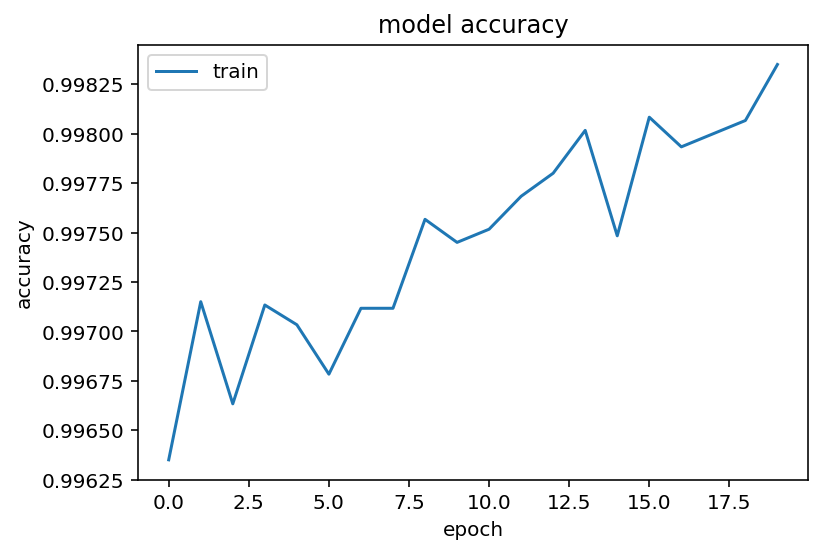

In [34]:
# summarize history for accuracy
#print(history.history.keys())
plt.plot(history.history['acc'])           #plot accuracy
plt.title('model accuracy')                #add a title for the plot
plt.ylabel('accuracy')                     #add a y axis label
plt.xlabel('epoch')                        #add x axis label
plt.legend(['train'], loc='upper left')    #add a legend and specify the position
plt.show()

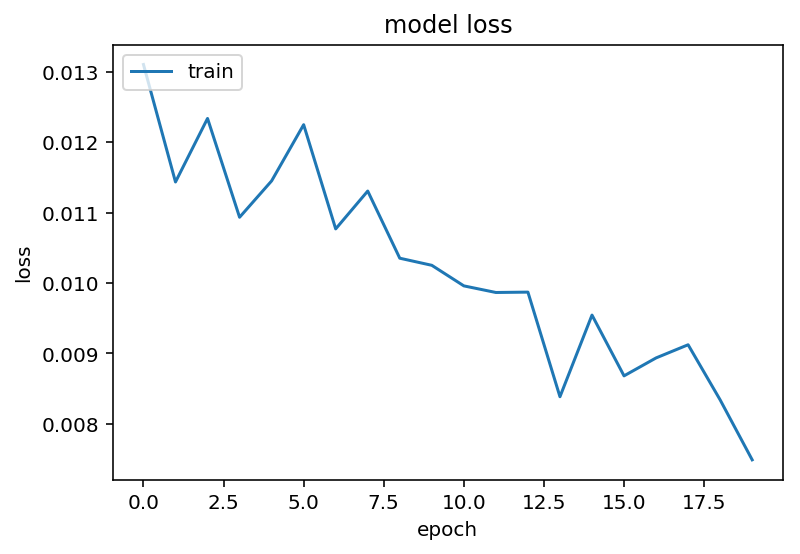

In [35]:
#lets plot loss now
plt.plot(history.history['loss'])          #plot loss
plt.title('model loss')                    #add a title for the plot
plt.ylabel('loss')                         #add a y axis label
plt.xlabel('epoch')                        #add x axis label
plt.legend(['train'], loc='upper left')    #add a legend and specify the position
plt.show()                                 #display plot

<h3>Step 9: Test a Case</h3>

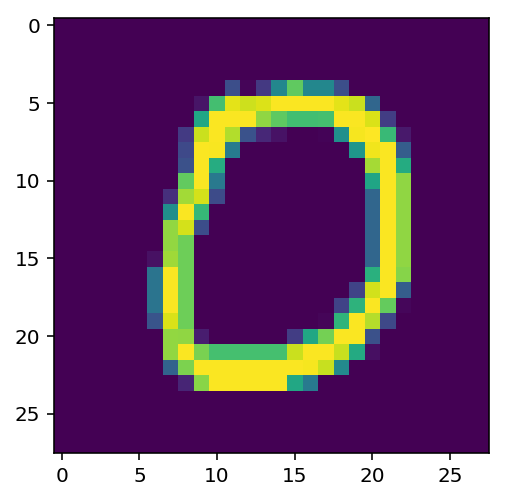

In [18]:
sample = test_x[10:11]                      #pull a case from test set
sample1 = sample.reshape((28,28))         #reshape it to 28x28 pixels
plt.imshow(sample1)                       #display the image


In [19]:
#sample = sample.reshape((1,784))                 #reshape the train set to 1x784
prediction = model.predict_classes(sample)       #based on the pixel values, predict the number
print("Class: ",prediction)                      #print the prediction

Class:  [0]


In [20]:
#display probabilty of each possible number
(model.predict(sample))

array([[1.0000000e+00, 1.3089637e-26, 7.1000561e-10, 7.3016861e-16,
        5.0780201e-27, 3.7992065e-13, 7.7791495e-11, 7.1064434e-16,
        7.7510318e-09, 3.1561720e-09]], dtype=float32)

<h3>Assignment 2</h3>
Try different cases! Are there numbers that are harder to classify?

Try plotting accuracy and loss for all epochs